# Part 01 :

# 1. Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data) and answer the following questions :

## Importing the necessary lib

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, palette="dark" )

## Load Dataset

In [4]:
mall_customers = pd.read_csv("Mall_Customers.csv")

## Exploratory Data Analysis (EDA)

In [5]:
mall_customers.sample(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
152,153,Female,44,78,20
61,62,Male,19,46,55
49,50,Female,31,40,42
196,197,Female,45,126,28
135,136,Female,29,73,88
77,78,Male,40,54,48
18,19,Male,52,23,29
78,79,Female,23,54,52
9,10,Female,30,19,72
33,34,Male,18,33,92


In [6]:
mall_customers.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [7]:
mall_customers.shape

(200, 5)

In [8]:
duplicate_rows = mall_customers[mall_customers.duplicated()]

print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [9]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
mall_customers.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Genre
Female    112
Male       88
dtype: int64


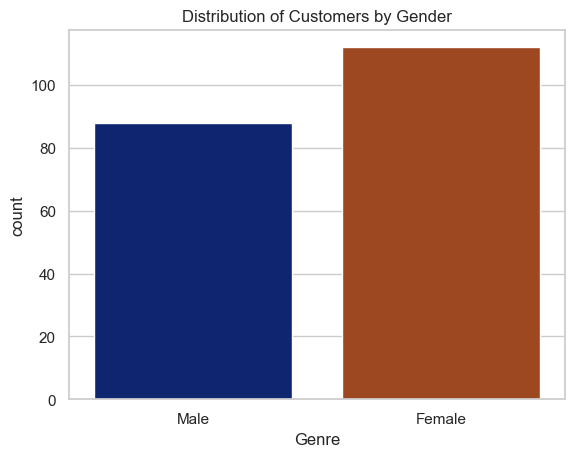

In [11]:
print(mall_customers.groupby('Genre').size())

sns.countplot(x='Genre', data=mall_customers)
plt.title("Distribution of Customers by Gender")
plt.show()


In [12]:
mall_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Checking skewness

In [13]:
numeric_skewness = mall_customers.select_dtypes(include=[np.number]).skew()
print("Skewness:")
print(numeric_skewness)

Skewness:
CustomerID            0.000000
Age                   0.485569
Annual_Income_(k$)    0.321843
Spending_Score       -0.047220
dtype: float64


## Applying Label Encoding to "Genre" column.

In [14]:
mall_customers_encoded = mall_customers.copy()
label_encoder = LabelEncoder()
mall_customers_encoded['Genre'] = label_encoder.fit_transform(mall_customers_encoded['Genre'])
mall_customers_encoded

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 

# 1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure. (10 Points)

## Def function for manhattan_distance measure

In [15]:
def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points.
    
    Parameters:
    - point1: Tuple or list representing the coordinates of the first point.
    - point2: Tuple or list representing the coordinates of the second point.
    
    Returns:
    - The Manhattan distance between the two points.
    """
    distance = sum(abs(x - y) for x, y in zip(point1, point2))
    return distance

## k-means clustering with Manhattan distance

In [16]:
features = mall_customers[['Age', 'Annual_Income_(k$)', 'Spending_Score']].values

k = 5 
kmeans = KMeans(n_clusters=k, init='k-means++', algorithm='elkan', n_init=10, random_state=34)

kmeans.fit(features)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

manhattan_distances = manhattan_distance(features, cluster_centers)

print("Cluster Centers:")
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual_Income_(k$)', 'Spending_Score'])
print(cluster_centers_df, '\n')

print("Manhattan Distances to Cluster Centers:", manhattan_distances)

Cluster Centers:
         Age  Annual_Income_(k$)  Spending_Score
0  43.282051           55.025641       49.692308
1  32.692308           86.538462       82.128205
2  25.521739           26.304348       78.565217
3  45.217391           26.304348       20.913043
4  40.324324           87.432432       18.189189 

Manhattan Distances to Cluster Centers: [ 73.03781373 202.60523065 162.28349754]


## Visualization of Cluster Center output using histogram

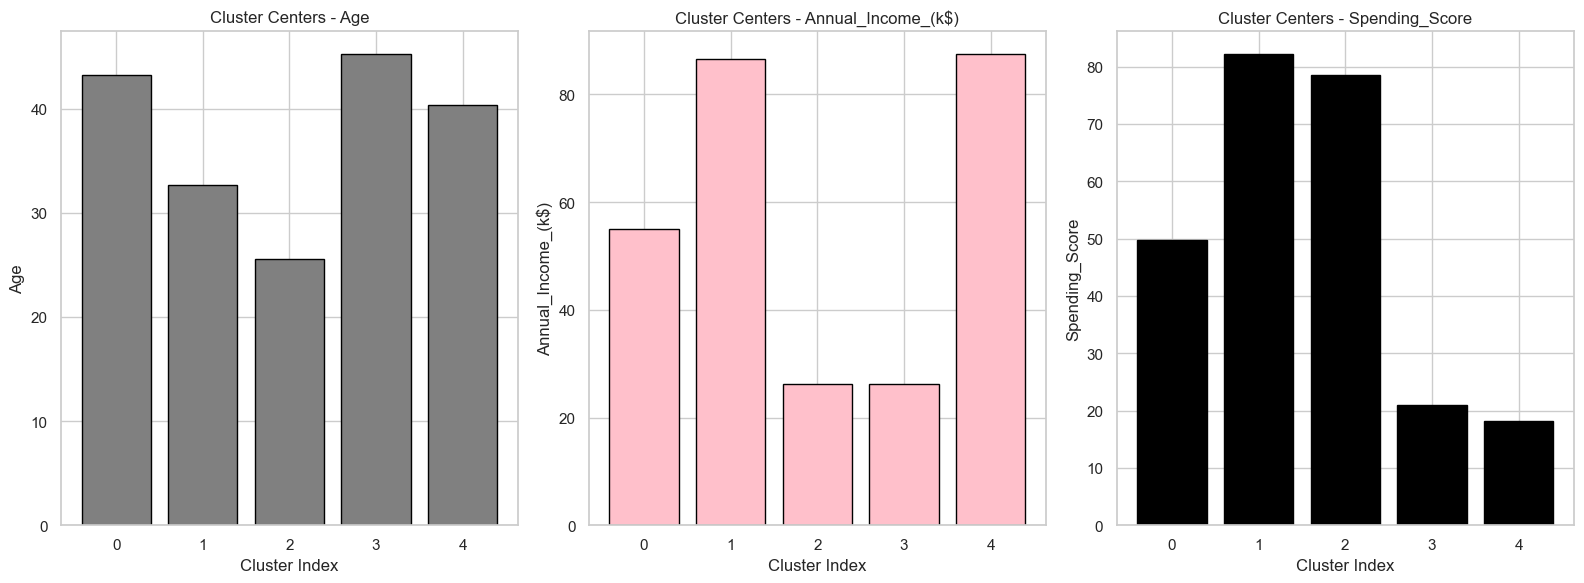

In [17]:
plt.figure(figsize=(16, 6))

colors = ['gray', 'pink', 'black']

for i, feature in enumerate(cluster_centers_df.columns):
    plt.subplot(1, 3, i+1)
    plt.bar(range(len(cluster_centers_df)), cluster_centers_df[feature], color=colors[i], edgecolor = 'black')
    plt.xlabel('Cluster Index')
    plt.ylabel(feature)
    plt.title(f'Cluster Centers - {feature}')
    plt.xticks(range(len(cluster_centers_df)))
    plt.tight_layout()

plt.show()

## Visualization for Manhattan Distances to Cluster Centers uisng histogram and box-plot

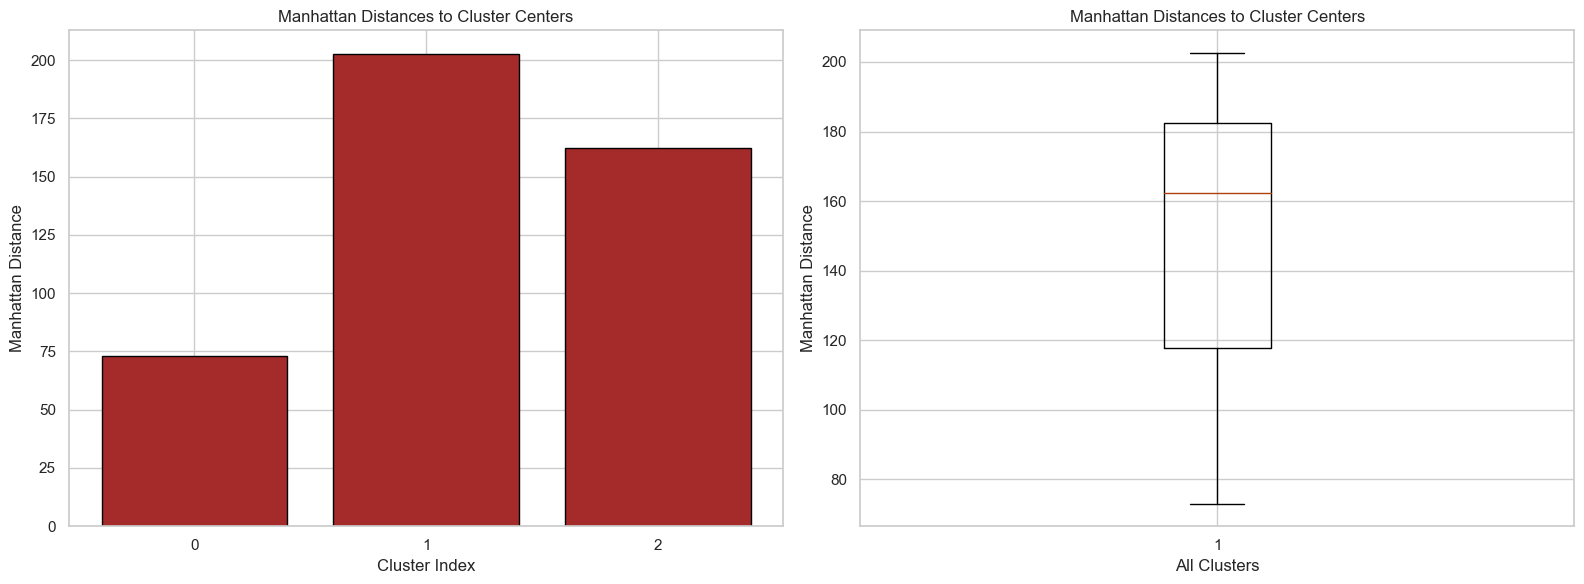

In [101]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(manhattan_distances)), manhattan_distances, color='Brown', edgecolor = 'black')
plt.xlabel('Cluster Index')
plt.ylabel('Manhattan Distance')
plt.title('Manhattan Distances to Cluster Centers')
plt.xticks(range(len(manhattan_distances)))

plt.subplot(1, 2, 2)
plt.boxplot(manhattan_distances)
plt.xlabel('All Clusters')
plt.ylabel('Manhattan Distance')
plt.title('Manhattan Distances to Cluster Centers')

plt.tight_layout()  
plt.show()

##  Visualization of the clusters to check if they have a distinct distinction in the feature space.

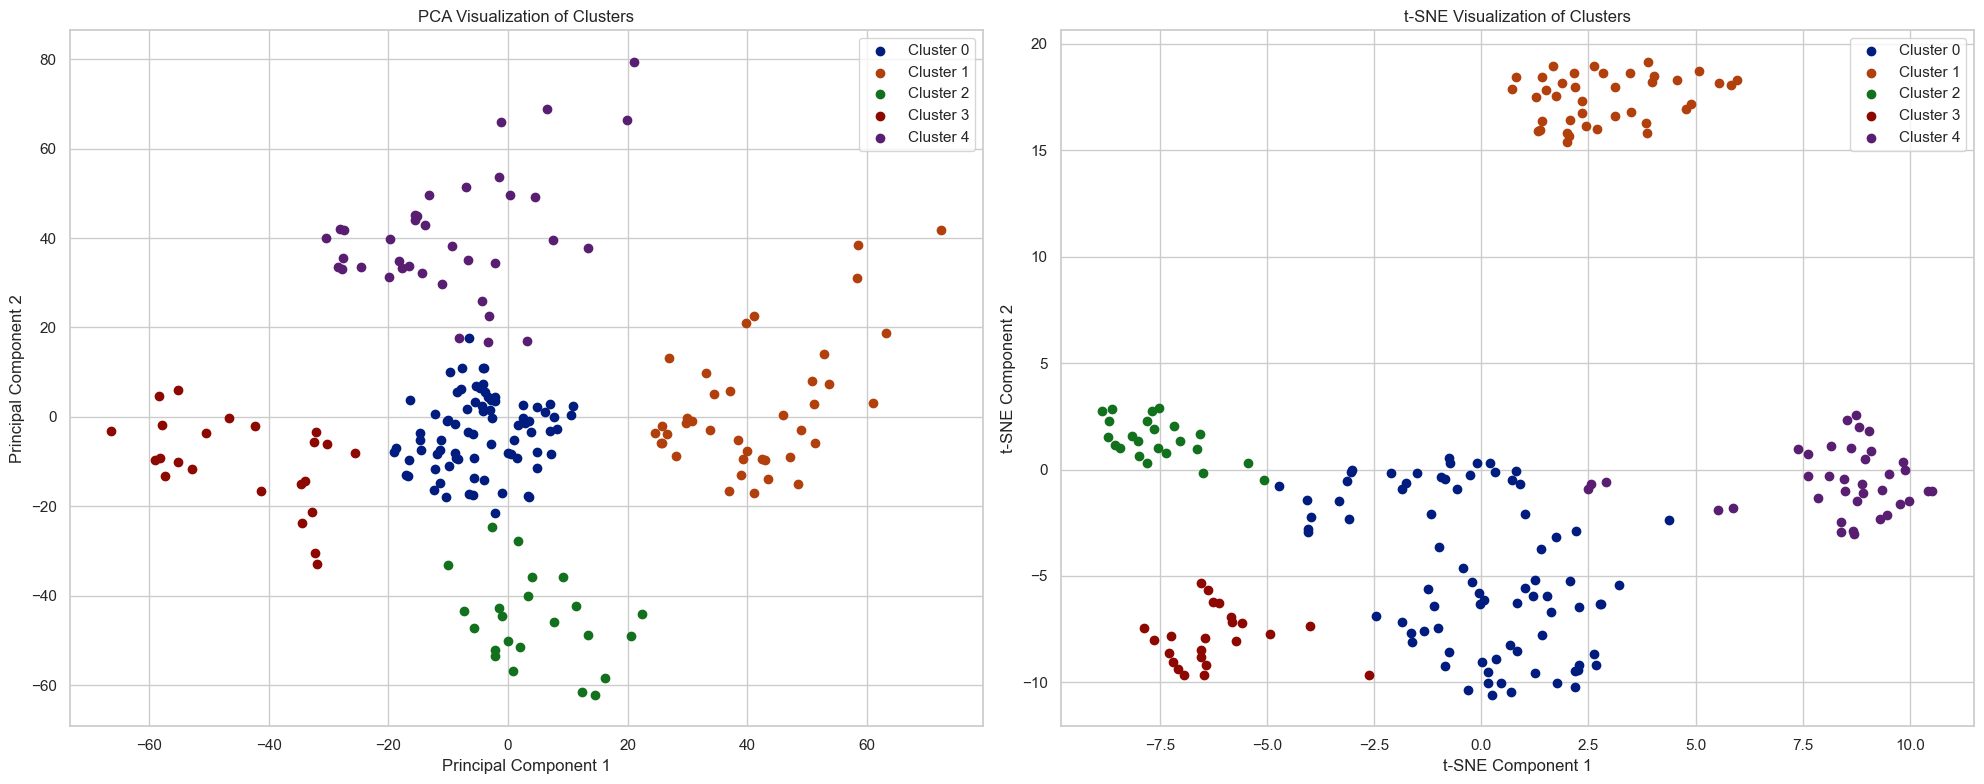

In [96]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(features)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
for label in set(cluster_labels):
    plt.scatter(data_pca[cluster_labels == label, 0], data_pca[cluster_labels == label, 1], label=f'Cluster {label}')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.subplot(1, 2, 2)
for label in set(cluster_labels):
    plt.scatter(data_tsne[cluster_labels == label, 0], data_tsne[cluster_labels == label, 1], label=f'Cluster {label}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.tight_layout()
plt.show()


The above output, displays the scatter plot for both PCA and t-SNE to identify clusters within the data. 

The clusters appear to be distinct and well-separated in the feature space, implying that the data points within each cluster are similar to one another while differentiating from data points in other clusters. This is a good indicator since it shows that the clustering algorithm successfully grouped comparable data points together.

# 

# 1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as ‘Labels’ and fill it with cluster number assigned by k-means algorithm. (5 Points)

## Adding the 'Lables' columns to Dataset.

In [20]:
mall_customers_with_labels = pd.DataFrame(mall_customers_encoded, columns=mall_customers_encoded.columns)
mall_customers_with_labels['Labels'] = cluster_labels
mall_customers_with_labels

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,1,19,15,39,3
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,4
197,198,1,32,126,74,1
198,199,1,32,137,18,4


In [21]:
print(mall_customers_with_labels.groupby('Labels').size())

Labels
0    78
1    39
2    23
3    23
4    37
dtype: int64


# 

# 1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression, decision trees, random forest, and Naive Bayes algorithm. (25 Points)

In [22]:
X = mall_customers_with_labels.drop(columns=['Labels'])
y = mall_customers_with_labels['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=98, stratify=y)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}


classifiers_accuracys = {}
for name, clf in classifiers.items():
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    classifiers_accuracys[name] = accuracy

for name, accuracy in classifiers_accuracys.items():
    print(f"{name}: Accuracy - {(accuracy)*100} %")

Logistic Regression: Accuracy - 88.75 %
Decision Tree: Accuracy - 96.25 %
Random Forest: Accuracy - 100.0 %
Naive Bayes: Accuracy - 98.75 %


In [53]:
sorted_classifiers_accuracys = sorted(classifiers_accuracys.items(), key=lambda x: x[1], reverse=True)

for name, accuracy in sorted_classifiers_accuracys:
    print(f"{name}: {round(accuracy, 4)*100} %")

Random Forest: 100.0 %
Naive Bayes: 98.75 %
Decision Tree: 96.25 %
Logistic Regression: 88.75 %


1. **Classification Results**:
    - Random Forest: Accuracy - 100.0%
    - Naive Bayes: Accuracy - 98.75%
    - Decision Tree: Accuracy - 96.25%
    - Logistic Regression: Accuracy - 89.75%
   
   All classification algorithms achieved high accuracies, indicating that they were able to successfully classify the data points into their respective clusters.


# 

# 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of clusters, like is the clusters or groups are making sense or not ? (10 Points)

1. **Homogeneity of Clusters**:
   - The classification algorithms' high accuracy ratings indicate that the clusters are somewhat homogeneous. 
   - High Accuracy: A high accuracy score implies that the supervised learning algorithms accurately classified the data points into their appropriate classes with high confidence. This implies that the data points within each class are largely uniform and distinguishable from those in other classes.

    - Impact on Cluster Homogeneity: While the accuracy of supervised learning methods does not directly assess cluster homogeneity, it does indirectly indicate cluster separation and coherence. Higher accuracy indicates that the clusters or groupings identified by the clustering algorithm make sense and are internally consistent.

   - Potential Insights: If the supervised learning algorithms perform well, it means that the clusters identified by the clustering algorithm are significant and represent separate groups in the data. In contrast, low accuracy may signal that the clusters are less uniform and require more refinement.

In conclusion, the high accuracy ratings obtained from the supervised learning methods indicate that the clusters produced by the clustering algorithm are most likely meaningful and internally homogeneous. Otherwise, if classification performance is low or inconsistent, it suggests that the clusters might not be well-separated or meaningful.

# 

# 

# Part 02 :

# 2. Consider the breast_cancer dataset given in the sklearn library and answer the following questions.

## Importing the necessary lib

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 

# 2.1 Import the breast_cancer dataset from sklearn.datasets library. (5 Points)

In [25]:
breast_cancer = load_breast_cancer()

## Convert to pandas DataFrame

In [26]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

## Exploratory Data Analysis (EDA)

In [27]:
pd.set_option('display.max_columns', None)
breast_cancer_df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
128,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,0.4309,1.0680,2.796,39.84,0.009006,0.041850,0.03204,0.022580,0.02353,0.004984,16.11,18.33,105.90,762.6,0.13860,0.2883,0.1960,0.14230,0.2590,0.07779,1
486,14.640,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.013930,0.01800,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.11420,0.2070,0.2437,0.07828,0.2455,0.06596,1
369,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.561,130.20,0.003978,0.028210,0.03576,0.014710,0.01518,0.003796,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574,0
18,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.018930,0.03391,0.015210,0.01356,0.001997,27.32,30.88,186.80,2398.0,0.15120,0.3150,0.5372,0.23880,0.2768,0.07615,0
117,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,0.4266,0.9489,2.989,41.18,0.006985,0.025630,0.03011,0.012710,0.01602,0.003884,18.81,27.37,127.10,1095.0,0.18780,0.4480,0.4704,0.20270,0.3585,0.10650,0
441,17.270,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,0.1467,0.05407,0.5100,1.6790,3.283,58.38,0.008109,0.043080,0.04942,0.017420,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.14360,0.4122,0.5036,0.17390,0.2500,0.07944,0
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,1.4670,1.994,17.85,0.003495,0.030510,0.03445,0.010240,0.02912,0.004723,12.02,28.26,77.80,436.6,0.10870,0.1782,0.1564,0.06413,0.3169,0.08032,1
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,1.4280,1.822,16.97,0.008064,0.017640,0.02595,0.010370,0.01357,0.003040,12.84,35.34,87.22,514.0,0.19090,0.2698,0.4023,0.14240,0.2964,0.09606,0
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.02,25.02,75.79,439.6,0.13330,0.1049,0.1144,0.05052,0.2454,0.08136,1
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,0.1532,0.4690,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1


In [28]:
breast_cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [29]:
breast_cancer_df.shape

(569, 31)

In [30]:
duplicate_rows = breast_cancer_df[breast_cancer_df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found. Details:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [31]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
null_counts = breast_cancer_df.isnull().sum()
if null_counts.any():
    print("Null values present. Details:")
    print(null_counts)
else:
    print("No null values present.")

No null values present.


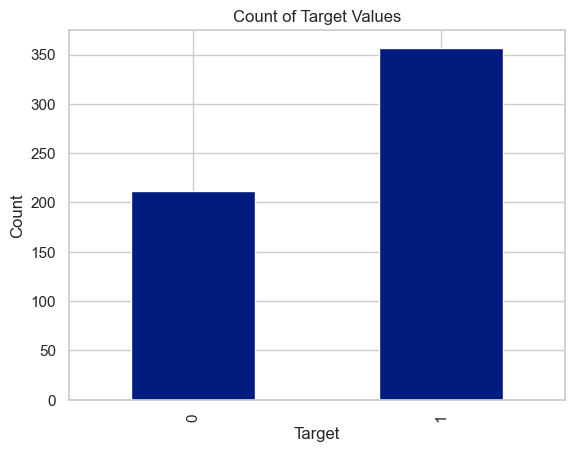

In [33]:
target_counts = breast_cancer_df.groupby('target').size()

target_counts.plot(kind='bar', title='Count of Target Values', xlabel='Target', ylabel='Count')

plt.show()

In [34]:
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Checking skewness 

In [35]:
numeric_skewness = breast_cancer_df.select_dtypes(include=[np.number]).skew()
print("Skewness:")
print(numeric_skewness)

Skewness:
mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave poin

## Handling the skewness

In [36]:
breast_cancer_new = breast_cancer_df.copy()
skew_threshold = 0.75

skewed_features = numeric_skewness[abs(numeric_skewness) > skew_threshold].index

breast_cancer_new[skewed_features] = np.log1p(breast_cancer_df[skewed_features])
print("Skewness after applying the log1p :\n")
breast_cancer_new.skew()

Skewness after applying the log1p :



mean radius                0.348744
mean texture               0.650450
mean perimeter             0.328800
mean area                  0.287328
mean smoothness            0.456324
mean compactness           1.043195
mean concavity             1.206982
mean concave points        1.083180
mean symmetry              0.725609
mean fractal dimension     1.272294
radius error               1.713417
texture error              0.629526
perimeter error            1.025375
area error                 0.847298
smoothness error           2.283394
compactness error          1.816278
concavity error            4.231738
concave points error       1.399869
symmetry error             2.135874
fractal dimension error    3.874373
worst radius               0.506347
worst texture              0.498321
worst perimeter            0.462758
worst area                 0.457614
worst smoothness           0.415426
worst compactness          1.048729
worst concavity            0.717939
worst concave points       0

## Histogram for all columns of Dataframe

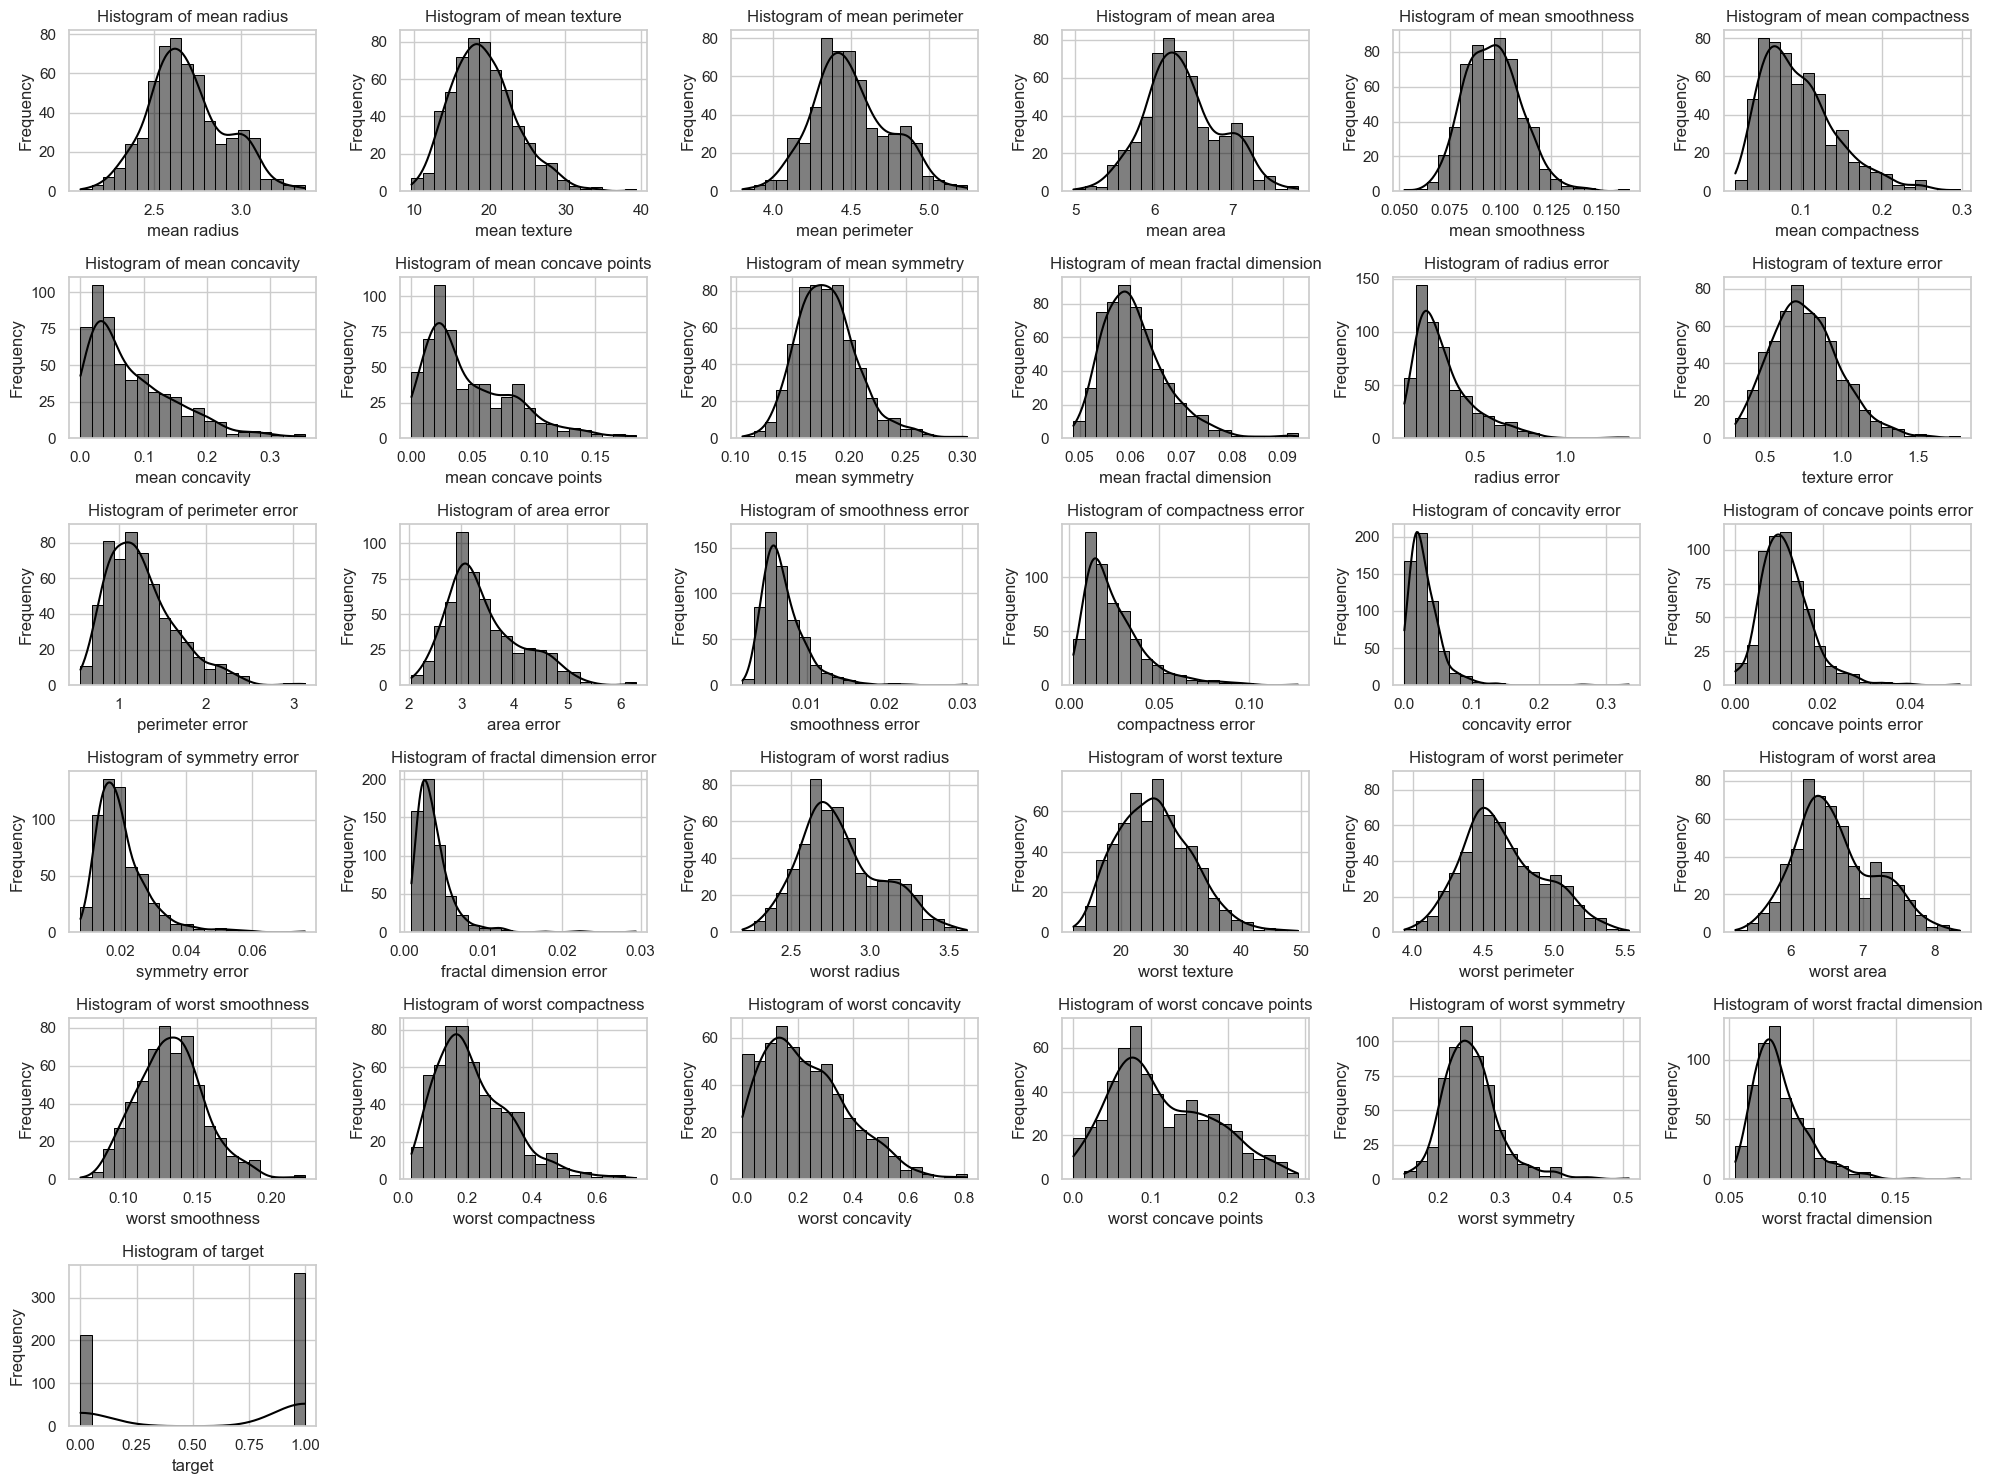

In [37]:
num_rows = 6
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(breast_cancer_new.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    sns.histplot(breast_cancer_new[column], kde=True ,bins=20, color='black', edgecolor='black', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)
    
for i in range(len(breast_cancer_new.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

## Box-plot 

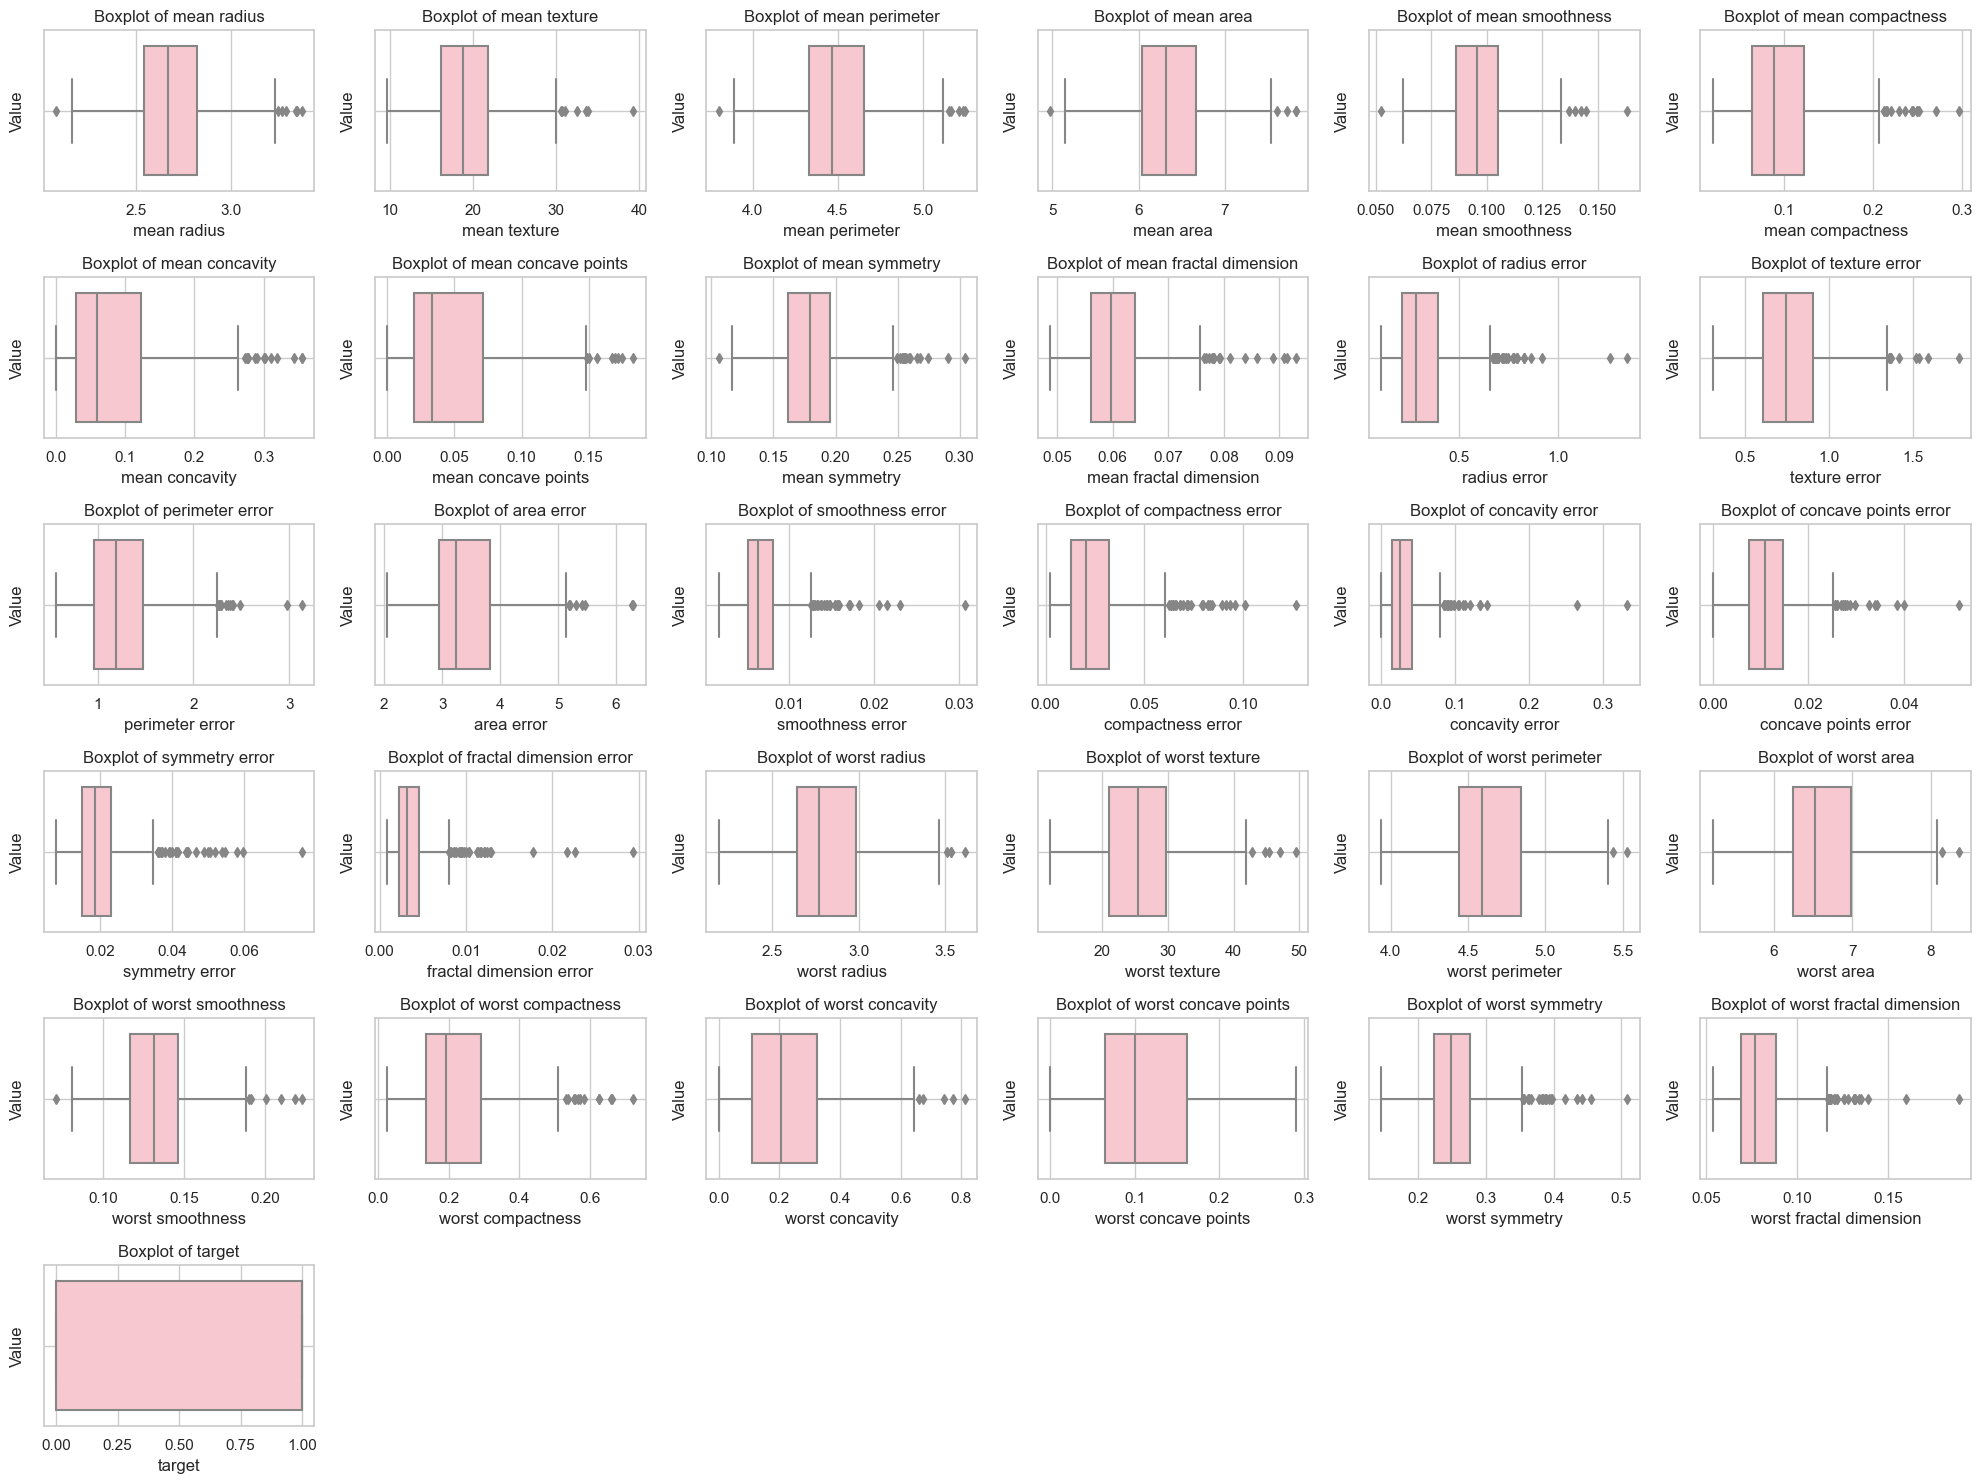

In [86]:
num_rows = 6
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(breast_cancer_new.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    sns.boxplot(x=breast_cancer_new[column], color='pink', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Value')
    ax.set_title(f'Boxplot of {column}')
    ax.grid(True)

for i in range(len(breast_cancer_new.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

## Outliers detection using quantile method 

In [39]:

Q1 = breast_cancer_new.quantile(0.25)
Q3 = breast_cancer_new.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (breast_cancer_new < (Q1 - threshold * IQR)) | (breast_cancer_new > (Q3 + threshold * IQR))

outliers_count = outliers.sum()
total_outliers1 = outliers_count.sum()
print("\nTotal number of outliers:", total_outliers1, '\n')


Total number of outliers: 388 



## Removing outliers using quantile method 

In [40]:
quantile_data = breast_cancer_new[~outliers.any(axis=1)]

print("Shape before removing outliers:", breast_cancer_new.shape)
print("Shape after removing outliers:", quantile_data.shape)

Q2 = quantile_data.quantile(0.25)
Q4 = quantile_data.quantile(0.75)

IQR = Q4 - Q2

threshold = 1.5

outliers2 = (quantile_data < (Q2 - threshold * IQR)) | (quantile_data > (Q4 + threshold * IQR))

print("Outliers:")
outliers_count2 = outliers2.sum()
total_outliers = outliers_count2.sum()
print("\nTotal number of outliers after performing the outlier removel:", total_outliers)

Shape before removing outliers: (569, 31)
Shape after removing outliers: (433, 31)
Outliers:

Total number of outliers after performing the outlier removel: 122


In [41]:
print("Date Loss after removing the outliers : ", ((569-433)/569)*100, '%')

Date Loss after removing the outliers :  23.901581722319857 %


## Box-plot after removing the outliers

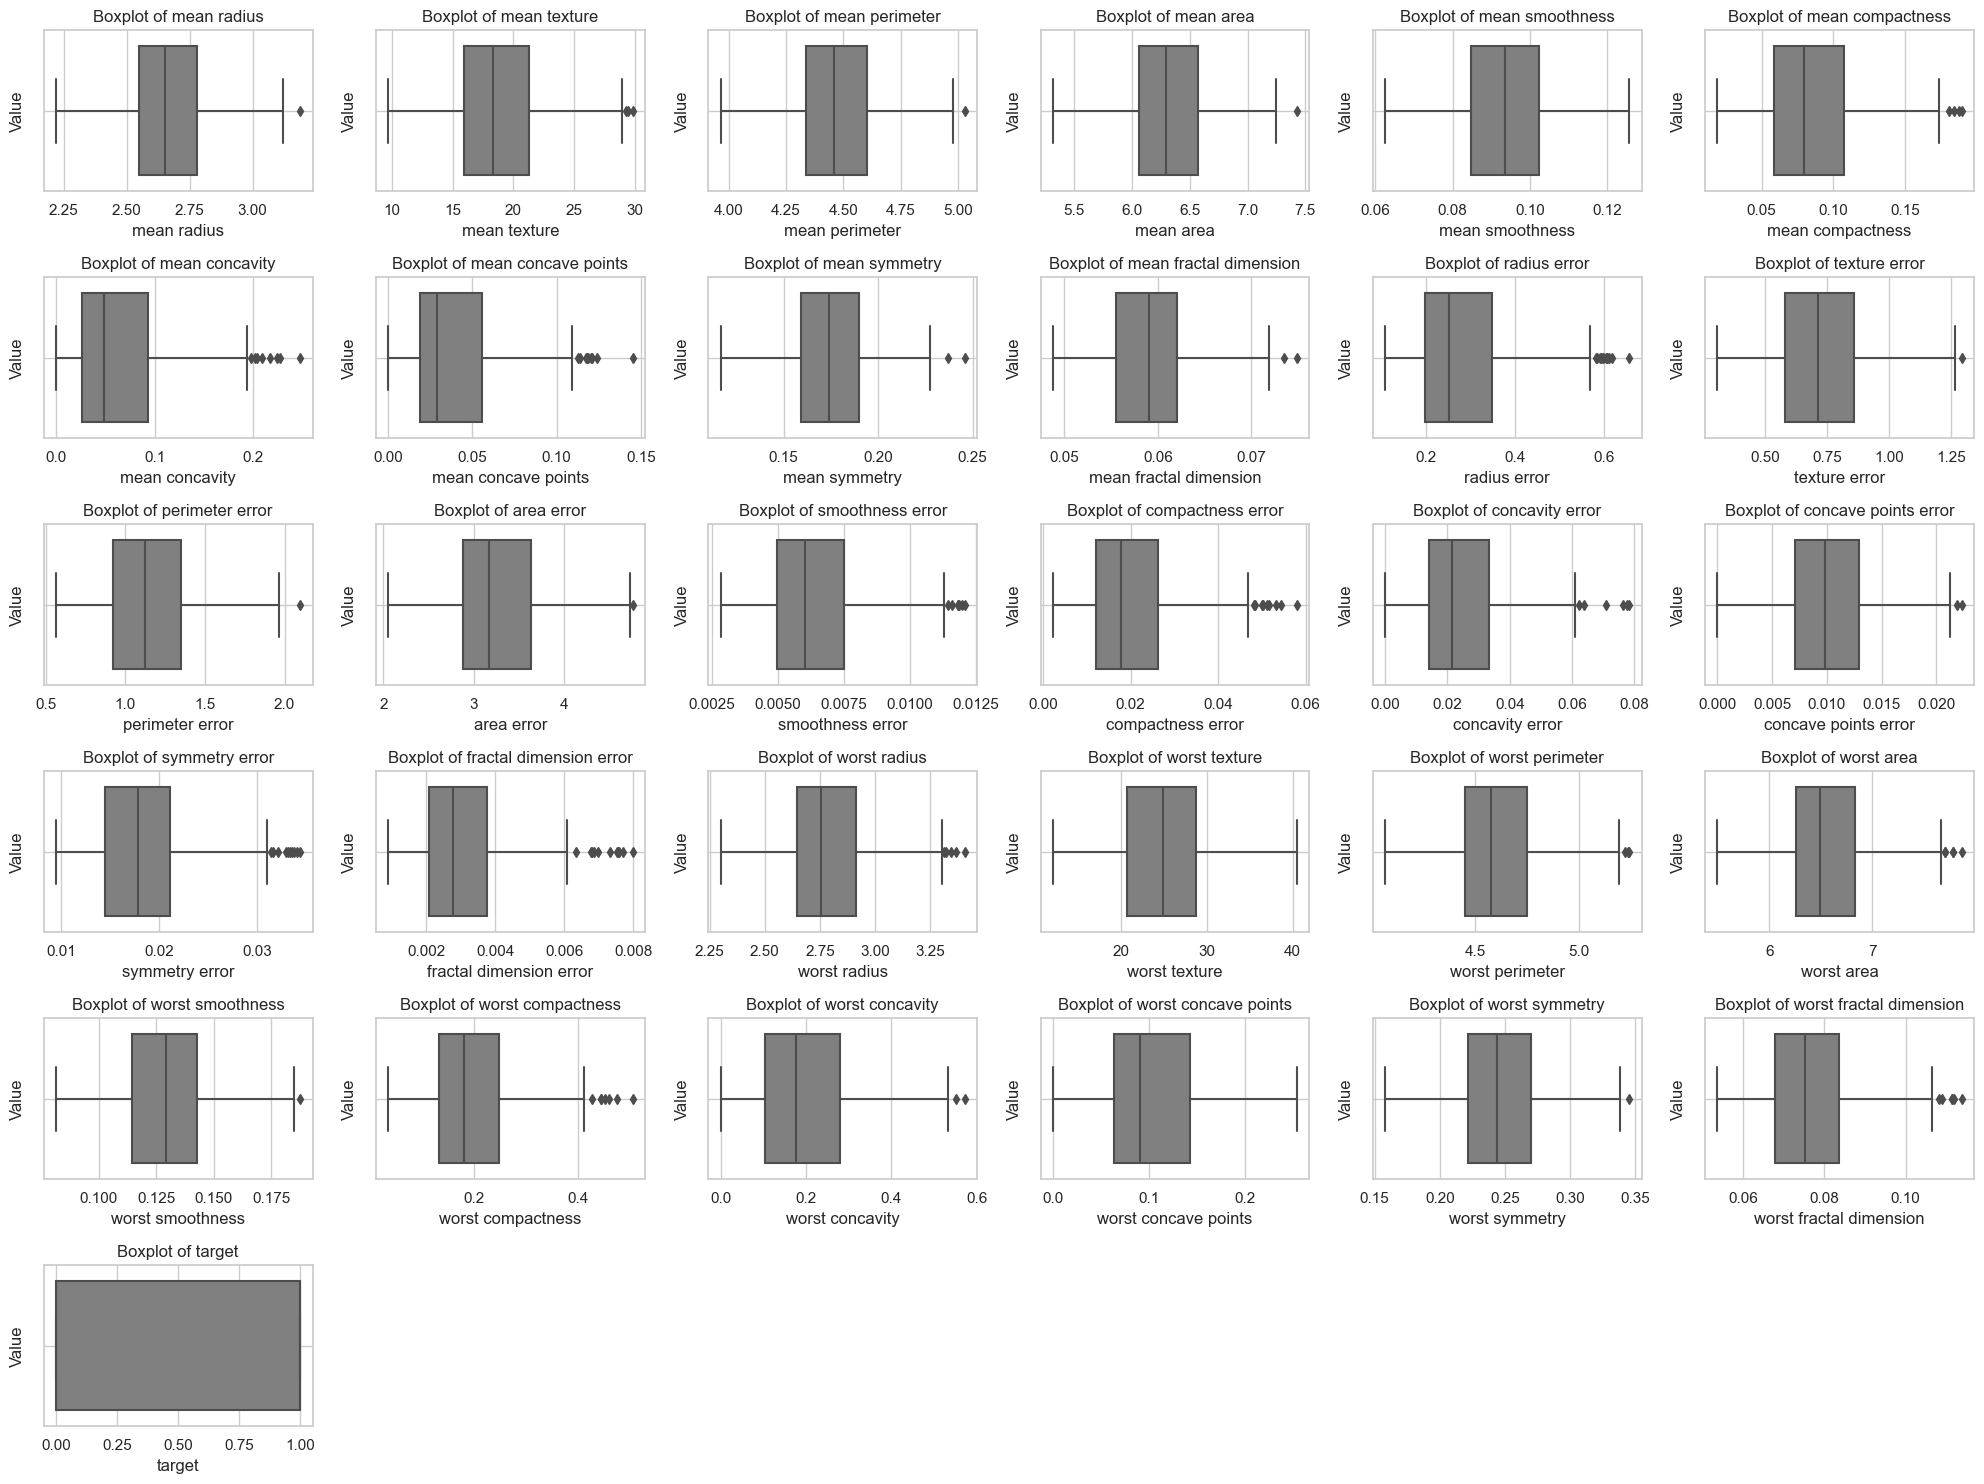

In [80]:
num_rows = 6
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(quantile_data.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    sns.boxplot(x=quantile_data[column], color='gray', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Value')
    ax.set_title(f'Boxplot of {column}')
    ax.grid(True)

for i in range(len(quantile_data.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

## Define X and Y

In [43]:
X = quantile_data.drop(['target'], axis=1) 
Y = quantile_data['target']

X = pd.get_dummies(X)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,3.071303,17.77,4.897093,7.190676,0.08474,0.075701,0.083330,0.067818,0.1812,0.055122,0.434053,0.550373,1.481150,4.318554,0.005211,0.012995,0.018429,0.013311,0.013794,0.003526,3.257712,23.41,5.073923,7.579168,0.1238,0.171092,0.216401,0.18600,0.242946,0.085278
2,3.029650,21.25,4.875197,7.093405,0.10960,0.148334,0.180153,0.120357,0.2069,0.058259,0.557098,0.580482,1.720084,4.554193,0.006131,0.039278,0.037604,0.020371,0.022251,0.004561,3.201526,25.53,5.033701,7.444249,0.1444,0.353821,0.371839,0.24300,0.308440,0.083955
4,3.058237,14.34,4.913390,7.168580,0.10030,0.124692,0.180653,0.099212,0.1809,0.057165,0.563722,0.577343,1.862218,4.558498,0.011424,0.024312,0.055321,0.018675,0.017408,0.005102,3.158701,16.67,5.031744,7.362645,0.1374,0.186480,0.336472,0.16250,0.212204,0.073975
6,2.957511,19.98,4.792479,6.947937,0.09463,0.103459,0.106789,0.071390,0.1794,0.055832,0.369285,0.572786,1.430311,4.005695,0.004305,0.013725,0.022290,0.010336,0.013597,0.002177,3.173041,27.66,5.038250,7.382124,0.1442,0.229205,0.320923,0.19320,0.267199,0.080363
7,2.688528,20.83,4.513055,6.361130,0.11890,0.152292,0.089530,0.058127,0.2196,0.071865,0.459638,0.865839,1.580215,3.950474,0.008766,0.029840,0.024576,0.014376,0.014751,0.005397,2.893700,28.14,4.714921,6.800170,0.1654,0.313496,0.237283,0.15560,0.277329,0.108944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2.423917,27.61,4.199755,5.775793,0.09030,0.073789,0.058259,0.027012,0.1593,0.059466,0.198769,1.175265,0.890768,2.738256,0.011978,0.026992,0.046922,0.017064,0.018262,0.004926,2.471484,34.91,4.256605,5.882208,0.1384,0.157858,0.182322,0.09127,0.200980,0.079578
558,2.746630,22.68,4.578724,6.489357,0.08473,0.124869,0.097943,0.036679,0.1454,0.059655,0.203267,0.745740,1.170623,3.022374,0.004233,0.045346,0.063707,0.015932,0.016247,0.004396,2.802148,27.27,4.671894,6.599190,0.1026,0.275432,0.312033,0.11050,0.203594,0.076998
560,2.711378,27.15,4.525911,6.399260,0.09929,0.106700,0.043653,0.042140,0.1537,0.059881,0.310788,0.913086,1.357895,3.428813,0.007230,0.026428,0.020498,0.016129,0.020587,0.005290,2.791165,33.17,4.617099,6.562020,0.1241,0.204083,0.124516,0.10480,0.202941,0.079929
565,3.050694,28.25,4.884316,7.140453,0.09780,0.098396,0.134531,0.093408,0.1752,0.053854,0.568434,1.242135,1.825033,4.605570,0.005752,0.023941,0.038740,0.016641,0.018802,0.002495,3.206398,38.25,5.049856,7.457032,0.1166,0.175800,0.278767,0.16280,0.228887,0.064260


## Applying Standard Scaler 

In [44]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\nScaled DataFrame using StandardScaler:")
X_scaled


Scaled DataFrame using StandardScaler:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.092937,-0.244628,1.982150,2.089041,-0.754191,-0.289086,0.380612,1.002205,0.294948,-0.891428,1.246656,-0.889997,1.019126,1.736042,-0.589733,-0.669121,-0.423463,0.738427,-0.910827,0.362940,2.100298,-0.287633,1.895448,2.124195,-0.270477,-0.261944,0.156817,1.524597,-0.110241,0.752230
1,1.870551,0.639468,1.877112,1.849882,1.333734,1.871704,2.315526,2.851326,1.501153,-0.207284,2.277146,-0.739206,1.785724,2.133038,-0.121606,1.816986,0.885998,2.456474,0.743633,1.157647,1.845631,0.087769,1.728890,1.837502,0.755005,1.790450,1.442080,2.574255,1.782742,0.636712
2,2.023178,-1.116021,2.060327,2.034714,0.552652,1.168386,2.325537,2.107108,0.280867,-0.446078,2.332615,-0.754926,2.241746,2.140292,2.572491,0.401331,2.095909,2.043623,-0.203904,1.573412,1.651523,-1.481129,1.720789,1.664102,0.406540,-0.089113,1.149642,1.091844,-0.998790,-0.234583
3,1.485397,0.316824,1.480303,1.492224,0.076444,0.536692,0.849435,1.127937,0.210466,-0.736689,0.704238,-0.777751,0.856015,1.208947,-1.051196,-0.600054,-0.159821,0.014563,-0.949425,-0.673173,1.716521,0.464942,1.747731,1.705493,0.745048,0.390777,1.021074,1.657186,0.590734,0.323080
4,0.049287,0.532767,0.139868,0.049454,2.114817,1.989453,0.504518,0.661166,2.097216,2.759851,1.460927,0.689908,1.336967,1.115911,1.219657,0.924245,-0.003723,0.997628,-0.723735,1.800307,0.450380,0.549939,0.408849,0.468889,1.800398,1.337525,0.329484,0.964780,0.883522,2.818371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,-1.363473,2.255229,-1.363071,-1.389701,-0.287221,-0.345957,-0.120391,-0.433931,-0.732909,0.055910,-0.723810,2.239561,-0.875058,-0.926398,2.854194,0.654864,1.522310,1.651603,-0.036697,1.438160,-1.463350,1.748747,-1.489002,-1.481704,0.456321,-0.410587,-0.124972,-0.219860,-1.323205,0.254574
429,0.359496,1.002760,0.454889,0.364723,-0.755031,1.173637,0.672648,-0.093700,-1.385292,0.097006,-0.686136,0.088430,0.022830,-0.447724,-1.087685,2.390929,2.668576,1.376333,-0.430920,1.031497,0.035413,0.395883,0.230677,0.041823,-1.325826,0.909997,0.947564,0.134261,-1.247653,0.029337
430,0.171286,2.138366,0.201538,0.143204,0.467825,0.633108,-0.412284,0.098480,-0.995739,0.146310,0.214334,0.926526,0.623674,0.237031,0.437557,0.601448,-0.282147,1.424229,0.418075,1.717807,-0.014366,1.440634,0.003774,-0.037159,-0.255543,0.108607,-0.602946,0.029295,-1.266523,0.285207
431,1.982902,2.417821,1.920856,1.965559,0.342684,0.386089,1.403821,1.902864,0.013343,-1.168167,2.372080,2.574460,2.122441,2.219598,-0.314372,0.366244,0.963563,1.548712,0.068935,-0.428760,1.867715,2.340183,1.795789,1.864666,-0.628897,-0.209062,0.672503,1.097368,-0.516596,-1.082725


# 

# 2.2 Perform PCA (2 components) and LDA (1 components) over the dataset. (20 Points)

## Perform PCA

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (PCA) components:")
print("PCA Component 1:", pca.explained_variance_ratio_[0])
print("PCA Component 2:", pca.explained_variance_ratio_[1])


Explained variance ratio (PCA) components:
PCA Component 1: 0.45393920463471377
PCA Component 2: 0.17305258074751867


In [46]:
print(f"Variance explained by the first 2 components: {sum(pca.explained_variance_ratio_[:2])}")

Variance explained by the first 2 components: 0.6269917853822324


## Perform LDA

In [47]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, Y)

print("Explained variance ratio (LDA):", lda.explained_variance_ratio_[0])

Explained variance ratio (LDA): 1.0


# 

# 2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset. (10 Points)

## Scatter Plot for the PCA (2 components)

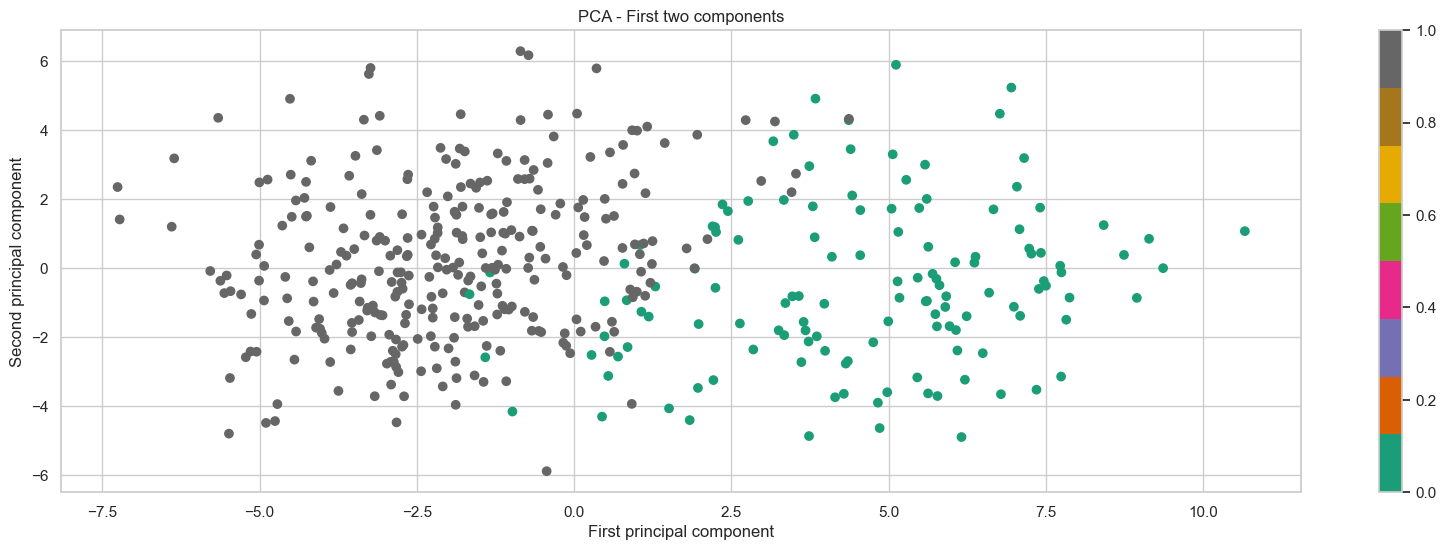

In [70]:
plt.figure(figsize=(20, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='Dark2')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA - First two components')
plt.colorbar()

## Scatter Plot for LDA (1 components)

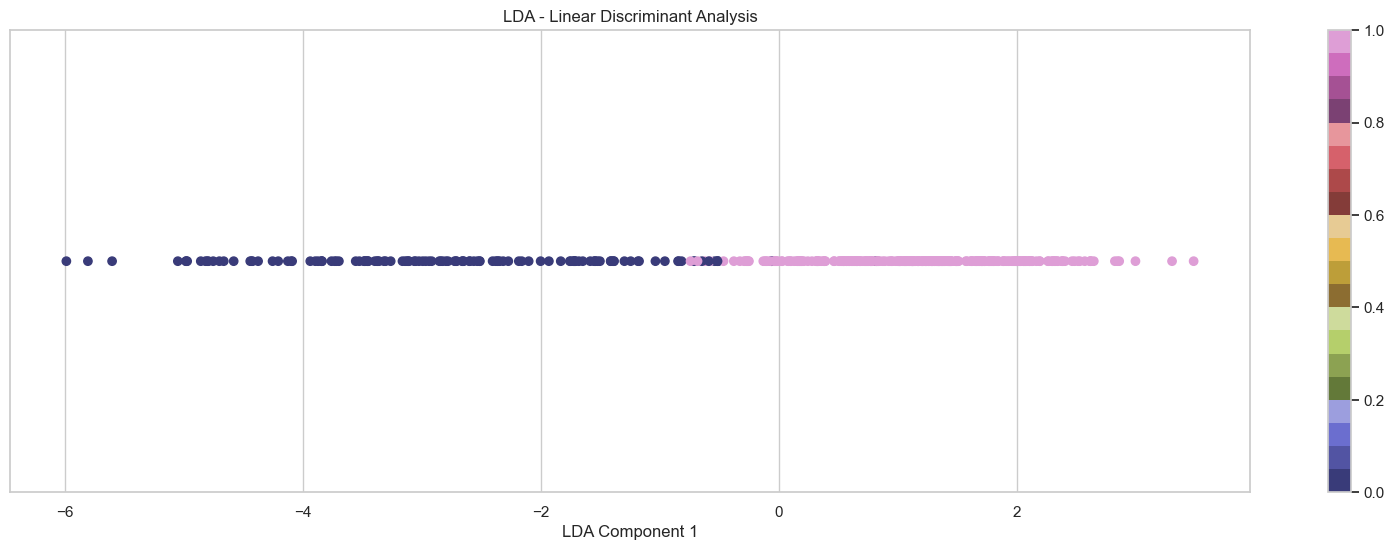

In [79]:
plt.figure(figsize=(20, 6))
plt.scatter(X_lda, [0] * len(X_lda), c=Y, cmap='tab20b') 
plt.yticks([])  
plt.xlabel('LDA Component 1')
plt.title('LDA - Linear Discriminant Analysis')
plt.colorbar()
plt.show()

# 

# 2.4 What is the maximum variance explained by both the components in PCA and LDA. (10 Points)

## Maximum variance explained by components in PCA

In [50]:
max_variance_pca = np.max(pca.explained_variance_ratio_)
print("Maximum variance explained by PCA components:", max_variance_pca)

Maximum variance explained by PCA components: 0.45393920463471377


## Maximum variance explained by component in LDA 

In [51]:
variance_lda = lda.explained_variance_ratio_[0]
print("Variance explained by the LDA component:", variance_lda)

Variance explained by the LDA component: 1.0


# 

# 2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset. (5 Points)

#### Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are two common dimensionality reduction approaches in machine learning and statistics, but they provide different functions and operate in different ways.

## PCA (Principal Component Analysis):

1. Purpose:
    - PCA is mostly used for unsupervised dimension reduction and feature extraction. 
    - PCA seeks to identify the directions (principal components) that maximize variance in the data. It does not take into account class labels.
    - PCA is an unsupervised technique, which means it does not employ class information during the computation.
    - It is useful for lowering the dimensionality of the feature space while preserving as much variance as possible. This makes it appropriate for tasks where maintaining the overall structure of the data is critical.
    
2. Working: 
    - PCA identifies orthogonal axes (principal components) in the feature space, with the first principal component capturing the most variation, the second principal component capturing the second most variance, and so on. Each primary component is a linear combination of the original attributes.

3. Objective: 
    - The goal of PCA is to project data onto a lower-dimensional subspace while retaining as much original variation as possible.

## LDA (Linear Discriminant Analysis):

1. Purpose: 
    - LDA aims to find the directions that maximize the separation between multiple classes in the data.
    - LDA is a supervised technique as it takes class labels into account during computation.
    - It's particularly useful for classification tasks, as it tries to find the feature subspace that optimally separates different classes.

2. Working: 
    - LDA aims to maximise the ratio of between-class to within-class variation. It projects the data onto a lower-dimensional space in such a way that the distances between the means of various classes are increased while the variations within each class are reduced.

3. Objective: 
    - The goal of LDA is to identify the linear combinations of features that best distinguish the classes in the dataset.

## Which one is better for the breast_cancer dataset:

- For the breast_cancer dataset, which is a classification problem, LDA may be more appropriate. This is because LDA directly models class differences and seeks to identify the feature subspace that maximizes class separation. Because the dataset includes class labels, LDA can use this information to identify the most discriminative features.

- If computing economy is an issue, PCA can also be used for visualization or to reduce the dimensionality of a dataset.

- Finally, the decision between PCA and LDA is determined by the precise analytic aims and the type of the dataset. 
    1. If classification is the goal and maximum class separation is important, LDA may be preferable. 
    2. If the goal is dimensionality reduction or visualization, PCA.